# Analysis of Lifestyle Behaviors' Affect on General Health Status in U.S. Adults in 2020

The Behavioral Risk Factor Surveillance System (BRFSS) is a collaborative initiative involving all U.S. states, participating territories, and the Centers for Disease Control and Prevention (CDC). Its primary goal is to gather consistent, state-specific data on health risk behaviors, chronic illnesses and conditions, healthcare access, and the utilization of preventive health services linked to the leading causes of death and disability in the U.S. The BRFSS conducts surveys via both landline and mobile phones, targeting individuals aged 18 and older. In 2020, the BRFSS examined various factors, including health status and healthy days, physical activity, inadequate sleep, chronic health issues, oral health, tobacco usage, cancer screenings, and healthcare access. The survey data for 2020 includes a total of 401,958 observations (respondents) and 393 variables. Some of these variables are calculated, and derived from responses to other questions to provide more detailed insights.

This study aims to explore the impact of various lifestyle behaviors on the general health status of adults in the United States. By examining smoking status, alcohol consumption, physical activity, and hours of sleep, we seek to understand how these factors influence overall health, as reported by respondents. Specifically, the study will address the question: **How do smoking status, alcohol consumption, physical activity, and hours of sleep affect the general health status of adults in the United States in 2020?** To achieve this, we will utilize the aforementioned extensive dataset provided by the BRFSS.

The original source of the BRFSS dataset from CDC utilized SAS format. For the ease of analysis using R, the CSV version of the same data provided by Ahmet Emre on Kaggle will be used.

## Variables

For this study, variables directly related to lifestyle behaviors and general health status were selected from the 2020 BRFSS dataset. These variables were chosen based on their relevance to the research question and their potential impact on health outcomes.  

| Variable                 | Variable Name | Question                                                                                                      | Values                                                                                                        | Type        |
|--------------------------|---------------|---------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|-------------|
| Health Status (Response) | GENHLTH       | Would you say that in general your health is?                                                                  | 1: Excellent, 2: Very good, 3: Good, 4: Fair, 5: Poor                                                         | Categorical |
| Smoking Status (Predictor)| X_SMOKER3      | (Calculated from other responses) Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker              | 1: Current smoker - now smokes every day, 2: Current smoker - now smokes some days, 3: Former smoker, 4: Never smoked, 9: Don’t know/Refused/Missing | Categorical |
| Alcohol Consumption (Predictor) | AVEDRNK3 | During the past 30 days, on the days when you drank, about how many drinks did you drink on average? (One drink is equivalent to a 12-ounce beer, a 5-ounce glass of wine, or a drink with one shot of liquor)          | 1-76: Number of drinks, 88: None, 77: Don’t know/Not sure, 99: Refused                                        | Numerical   |
| Physical Activity (Predictor) | EXERANY2  | During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise? | 1: Yes, 2: No, 7: Don’t know/Not sure, 9: Refused                                                             | Categorical |
| Hours of Sleep (Predictor) | SLEPTIM1    | On average, how many hours of sleep do you get in a 24-hour period?                                            | 1-24: Number of hours, 77: Don’t know/Not sure, 99: Refused                                                   | Numerical  |


The variable of General Health Status serves as the response variable in our analysis, representing the overall health status of individuals, it will be binary encoded as:

Good - Respondents who reported having excellent, very good or good health (GENHLTH = 1, 2, 3);

Poor - Respondents who reported having fair or poor health (GENHLTH = 4, 5).

Note: for all variables, responses such as 'Don't know/Not sure' and 'Refused' will be treated as missing values.

Sex (SEXVAR - 1:Male, 2:Female) and age (X_AGEG5YR - age group of respondent encoded from 1 to 14 as "18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+", "Unknown") are two potential confounders in our analysis because they are both known to influence health behaviors and outcomes. These variables will also be included in our model as we aim to isolate the effect of the primary predictors on general health status. This approach helps to provide a more accurate and unbiased assessment of how these lifestyle behaviors impact health outcomes, accounting for the underlying influence of sex and age.

## Data Acquisition and Cleaning

The original 2020 BRFSS dataset contains 401,958 observations and 393 columns, the complied CSV file is 323MB in size. As such, a subset of the data has been obtained via the following code in a more robust program and saved as the dataset to be used for this study:

Selecting the specific columns:
selected_data <- brfss2020 %>% select("GENHLTH", "X_SMOKER3", "AVEDRNK3", "EXERANY2", "SLEPTIM1", "SEXVAR", "X_AGEG5YR")

Save modified data:
write.csv(selected_data, "/local_pc_path/brfss2020_modified.csv", row.names = FALSE)

In [ ]:
install.packages("leaps")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Loading libraries
library(readr)
library(dplyr)
library(ggplot2)
library(car)
library(leaps)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [ ]:
# Loading dataset
data <- read_csv("https://drive.google.com/u/0/uc?id=1UJgHfrEEU0vURb9ZDyo6tU2i9i5TONFE&export=download", show_col_types=FALSE)
head(data)

GENHLTH,X_SMOKER3,AVEDRNK3,EXERANY2,SLEPTIM1,SEXVAR,X_AGEG5YR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,NA,1,5,2,8
3,9,NA,1,7,2,10
3,4,NA,1,7,2,10
1,4,NA,2,6,2,13
2,4,NA,1,7,2,13
4,3,NA,1,8,1,10


In [ ]:
# Data Cleaning
data_cleaned <- data %>%
  mutate(
    General_Health = factor(GENHLTH, levels = 1:5, labels = c("Excellent", "Very good", "Good", "Fair", "Poor")),  # Encode health status
    Smoking_Status = factor(X_SMOKER3, levels = c(1, 2, 3, 4, 9), labels = c("Everyday smoker", "Someday smoker",
                                                                             "Former smoker", "Non-smoker", "Unknown")), # Encode smoking status
    Physical_Activity = factor(EXERANY2, levels = c(1, 2, 7, 9), labels = c("Yes", "No", "Unknown", "Refused")), # Encode physical activity
    Avg_Drinks_Per_Day = replace(AVEDRNK3, AVEDRNK3 %in% c(77, 99), NA),  # Remove "Don't know" and "Refused"
    Avg_Drinks_Per_Day = replace(Avg_Drinks_Per_Day, Avg_Drinks_Per_Day == 88, 0),  # Convert 88 "None" to 0
    Hours_of_Sleep = replace(SLEPTIM1, SLEPTIM1 %in% c(77, 99), NA),  # Remove "Don't know" and "Refused"
    Health_Status_Binary = ifelse(General_Health %in% c("Excellent", "Very good", "Good"), "Good", "Poor"),  # Binary encoding of health status
    Sex = factor(SEXVAR, levels = c(1, 2), labels = c("Male", "Female")),  # Encode sex
    Age_Group = factor(X_AGEG5YR, levels = 1:14, labels = c("18-24", "25-29", "30-34", "35-39", "40-44", "45-49",
                                                            "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+", "Unknown"))  # Encode age groups
  ) %>%
  select(-GENHLTH, -X_SMOKER3, -EXERANY2, -AVEDRNK3, -SLEPTIM1, -SEXVAR, -X_AGEG5YR) %>%  # Remove original columns
  filter(!is.na(General_Health), !is.na(Avg_Drinks_Per_Day), !is.na(Hours_of_Sleep), !Smoking_Status %in% c("Unknown"),
         !Physical_Activity %in% c("Unknown", "Refused"), !Sex %in% c("Unknown"), !Age_Group %in% c("Unknown"))  # Remove rows with NA or refused values

# Convert hours of sleep and alcohol consumption to numeric
data_cleaned$Avg_Drinks_Per_Day <- as.numeric(data_cleaned$Avg_Drinks_Per_Day)
data_cleaned$Hours_of_Sleep <- as.numeric(data_cleaned$Hours_of_Sleep)

# Check for missing values
cat("Check for missing values:", "\n")
print(colSums(is.na(data_cleaned)))

# Summary statistics for the dataset
cat("\n", "Summary statistics for the cleaned dataset:", "\n")
print(summary(data_cleaned))

# Data preview
cat("\n", "Number of observations:", nrow(data_cleaned), "\n", "\n")
cat("Preview of the cleaned dataset:")
head(data_cleaned)

Check for missing values: 
      General_Health       Smoking_Status    Physical_Activity 
                   0                    0                    0 
  Avg_Drinks_Per_Day       Hours_of_Sleep Health_Status_Binary 
                   0                    0                    0 
                 Sex            Age_Group 
                   0                    0 

 Summary statistics for the cleaned dataset: 
   General_Health          Smoking_Status   Physical_Activity
 Excellent:42877   Everyday smoker: 17867   Yes    :151940   
 Very good:72387   Someday smoker :  7770   No     : 30838   
 Good     :49642   Former smoker  : 53738   Unknown:     0   
 Fair     :14402   Non-smoker     :103403   Refused:     0   
 Poor     : 3470   Unknown        :     0                    
                                                             
                                                             
 Avg_Drinks_Per_Day Hours_of_Sleep   Health_Status_Binary     Sex       
 Min.   : 0.000

General_Health,Smoking_Status,Physical_Activity,Avg_Drinks_Per_Day,Hours_of_Sleep,Health_Status_Binary,Sex,Age_Group
<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<fct>
Very good,Former smoker,Yes,1,8,Good,Male,75-79
Very good,Non-smoker,Yes,2,6,Good,Female,50-54
Excellent,Non-smoker,Yes,1,8,Good,Male,80+
Very good,Non-smoker,No,1,7,Good,Female,70-74
Fair,Former smoker,Yes,1,8,Poor,Male,80+
Very good,Former smoker,Yes,2,5,Good,Male,60-64


## Exploratory data analysis

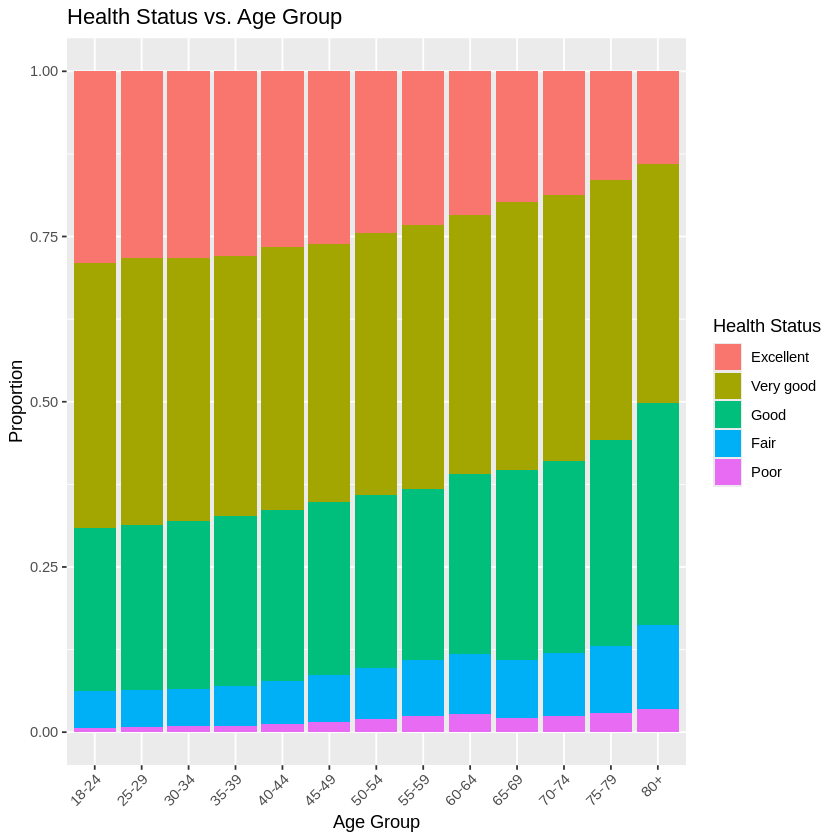

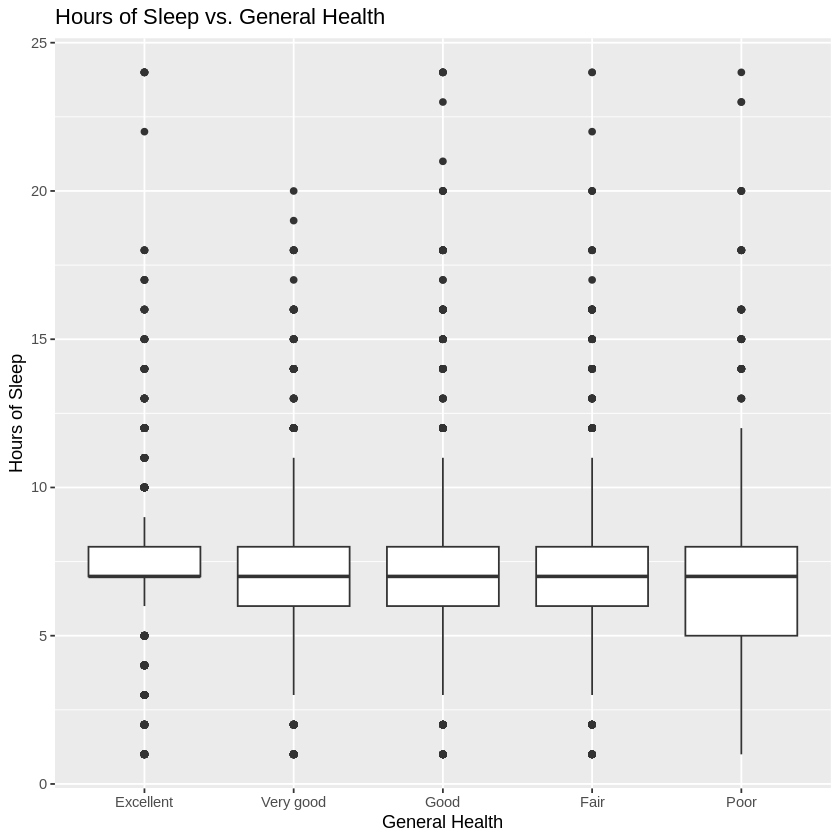

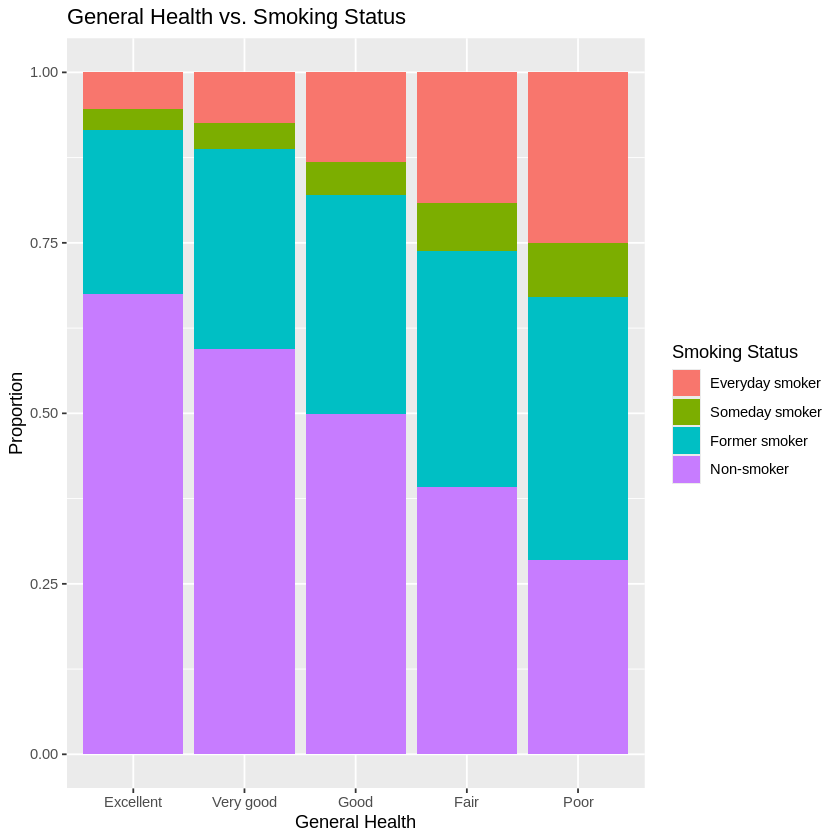

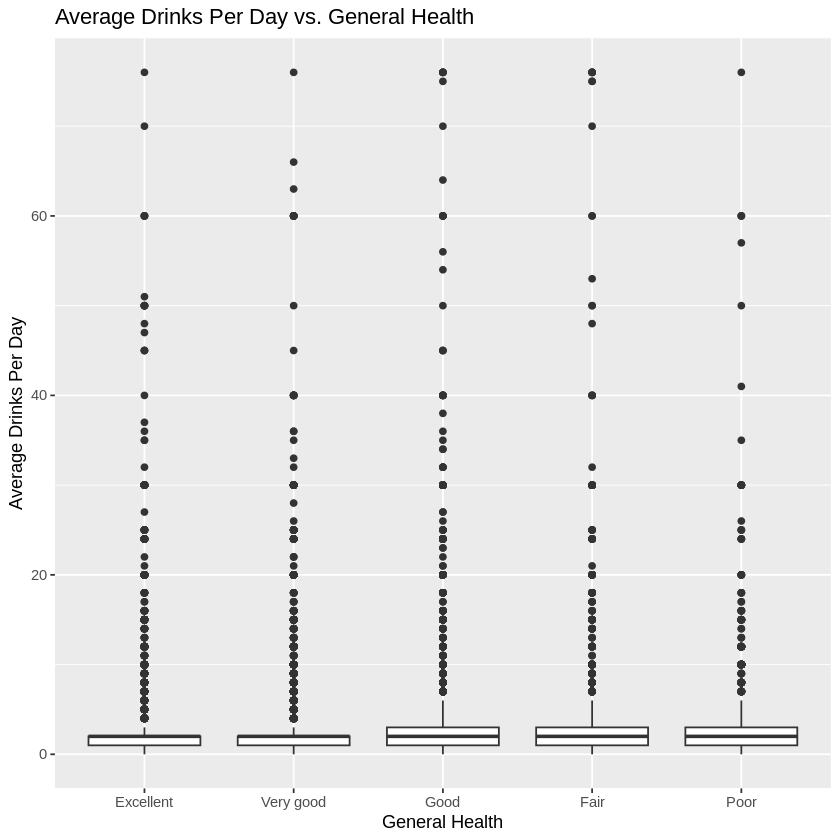

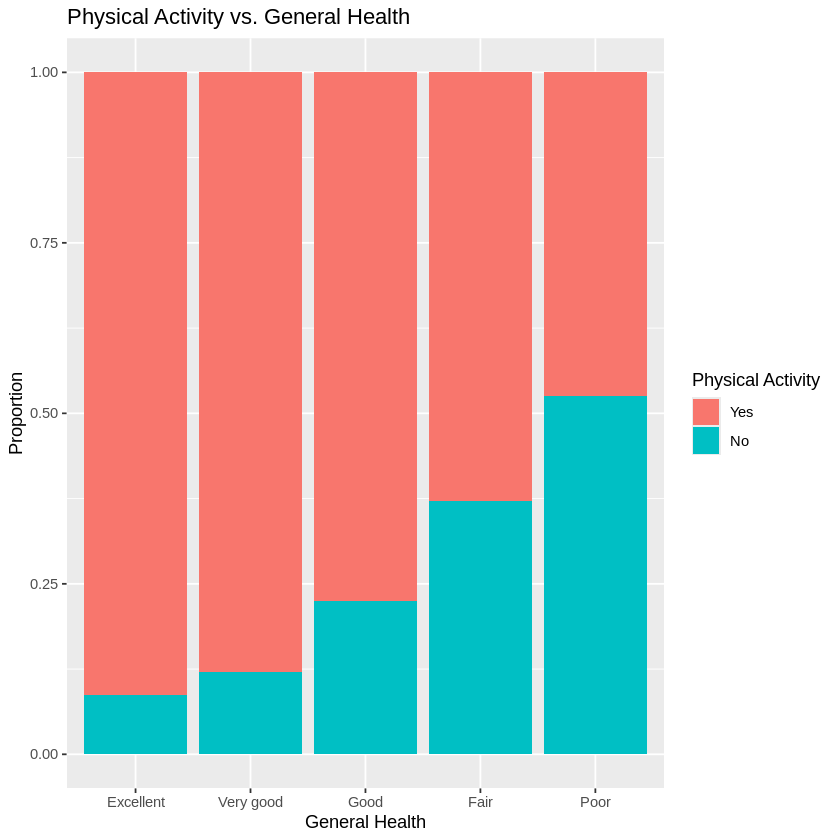

In [ ]:
# Health status plotted agianst different predictors
ggplot(data_cleaned,aes(x = Age_Group,fill=General_Health)) +
  geom_bar(position="fill")+
  labs(title="Health Status vs. Age Group", x="Age Group",y ="Proportion",fill="Health Status") +
  theme(axis.text.x=element_text(angle=45, hjust =1)) # Rotate x-axis labels

ggplot(data_cleaned,aes(x =General_Health, y=Hours_of_Sleep))+
  geom_boxplot() +
  labs(title="Hours of Sleep vs. General Health", x= "General Health", y ="Hours of Sleep")

ggplot(data_cleaned,aes(x=General_Health,fill=Smoking_Status))+
  geom_bar(position = "fill") +
  labs(title="General Health vs. Smoking Status",x="General Health",y= "Proportion", fill="Smoking Status")

ggplot(data_cleaned,aes(x=General_Health,y=Avg_Drinks_Per_Day))+
  geom_boxplot()+labs(title="Average Drinks Per Day vs. General Health",x="General Health",y = "Average Drinks Per Day")

ggplot(data_cleaned,aes(x=General_Health,fill=Physical_Activity))+
  geom_bar(position="fill")+
  labs(title ="Physical Activity vs. General Health",x= "General Health",y = "Proportion",fill="Physical Activity")

The bar plot "Health Status vs. Age Group" shows that as age increases, the proportion of people who have "excellent" health generally decreases. And people with poor health status increases, which follows the general logic that as people age their health status declines.

From the side-by-side boxplot "Hours of Sleep vs. General Health" which shows hours of sleep across all health statuses, it is evident that median hours of sleep is about the same for all health statuses and remains consistent at around 7-8 hours. For people with poor health, the variability of sleeping hours is larger and the 25th percentile is the lowest among all groups. Moreover, there are outliers in hours of sleep present across the spectrum which implies sleeping hours alone might not be a good predictor for health status.

The bar plot "General Health vs. Smoking Status" shows the proportion of smoking statuses across different general health categories. This plot shows non-smoker dominates (>50%) the "Excellent" and "Very good" health categories, but people who are everyday smokers are increasingly common to have poor health. This plot suggests smoking frequency might have an inverse relationship with health status.

The box plot "Average Drinks Per Day vs. General Health" shows that the median number of drinks per day is similar across all health categories, with similar distributions. However, there are numerous outliers in each group. It shows no clear trend linking higher alcohol consumption to poorer health.

The bar plot "Physical Activity vs. General Health" shows that people who have better general health are more likely to participate in physical activity. Participation in physical activity dominates the "Excellent" and "Very good" health category. For people who have poorer health, the proportion of individuals not participating in physical activity increases significantly, especially in the "Poor" health category.

## Statistical Modeling


In [ ]:
# Preparation
data_cleaned2 <- data_cleaned %>%
  mutate(Health_Status_Binary=ifelse(General_Health%in% c("Excellent","Very good", "Good"),1,0))

#logistic regression model
model_logistic = glm(Health_Status_Binary~Smoking_Status+Physical_Activity+Avg_Drinks_Per_Day+
  Hours_of_Sleep+Sex+Age_Group,data = data_cleaned2,family="binomial"(link='logit'))
summary(model_logistic)


Call:
glm(formula = Health_Status_Binary ~ Smoking_Status + Physical_Activity + 
    Avg_Drinks_Per_Day + Hours_of_Sleep + Sex + Age_Group, family = binomial(link = "logit"), 
    data = data_cleaned2)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   1.272258   0.060726  20.951  < 2e-16 ***
Smoking_StatusSomeday smoker  0.057036   0.037297   1.529 0.126200    
Smoking_StatusFormer smoker   0.590837   0.024836  23.790  < 2e-16 ***
Smoking_StatusNon-smoker      1.062852   0.024075  44.148  < 2e-16 ***
Physical_ActivityNo          -1.202656   0.017383 -69.185  < 2e-16 ***
Avg_Drinks_Per_Day           -0.027063   0.002663 -10.164  < 2e-16 ***
Hours_of_Sleep                0.129758   0.005929  21.884  < 2e-16 ***
SexFemale                     0.055335   0.016599   3.334 0.000857 ***
Age_Group25-29                0.112290   0.054545   2.059 0.039527 *  
Age_Group30-34                0.148606   0.053519   2.777 0.005492 ** 
A

In [ ]:
# Checking for muticollinearity
vif_values <- vif(model_logistic)
print(vif_values)

                       GVIF Df GVIF^(1/(2*Df))
Smoking_Status     1.163294  3        1.025530
Physical_Activity  1.027220  1        1.013518
Avg_Drinks_Per_Day 1.087756  1        1.042956
Hours_of_Sleep     1.039043  1        1.019335
Sex                1.027215  1        1.013516
Age_Group          1.180485 12        1.006938


No muticollinearity

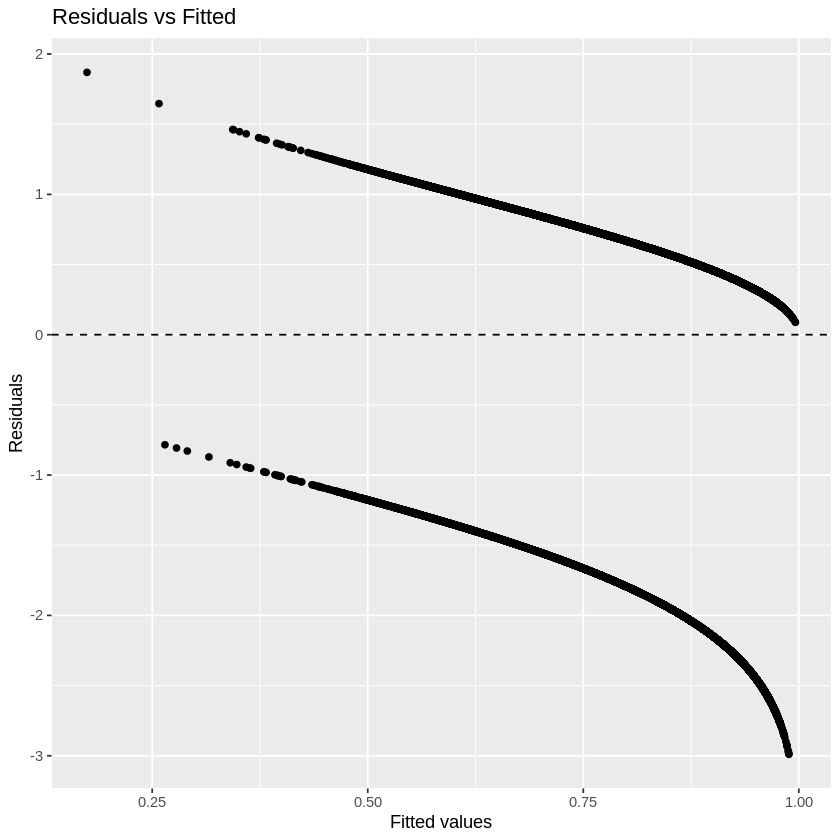

In [ ]:
# Plot residuals
residuals <- residuals(model_logistic, type = "deviance")
fitted_values <- fitted(model_logistic)
ggplot(data = NULL, aes(x = fitted_values, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Residuals vs Fitted", x = "Fitted values", y = "Residuals")

In [ ]:
# Subset selection
s <- regsubsets(Health_Status_Binary ~ Smoking_Status + Physical_Activity +
                             Avg_Drinks_Per_Day + Hours_of_Sleep + Sex + Age_Group,
                           data = data_cleaned2, nvmax = 10)
ss <- summary(s)
ss$which

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“4  linear dependencies found”


Reordering variables and trying again:


,(Intercept),Smoking_StatusSomeday smoker,Smoking_StatusFormer smoker,Smoking_StatusNon-smoker,Smoking_StatusUnknown,Physical_ActivityNo,Physical_ActivityUnknown,Physical_ActivityRefused,Avg_Drinks_Per_Day,Hours_of_Sleep,⋯,Age_Group40-44,Age_Group45-49,Age_Group50-54,Age_Group55-59,Age_Group60-64,Age_Group65-69,Age_Group70-74,Age_Group75-79,Age_Group80+,Age_GroupUnknown
1,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
6,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
7,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE
8,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE
9,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
10,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


[1] 4735.8337 2469.2843 1742.8694 1386.4172 1044.6692  905.3537  753.7111
 [8]  581.9130  426.8758  270.8908  143.9038

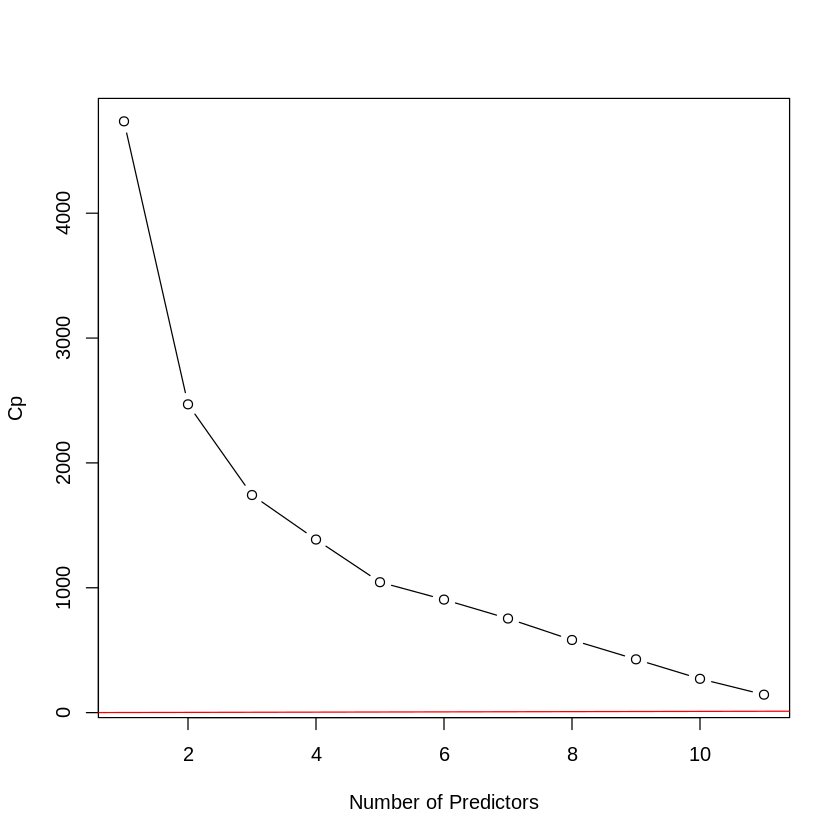

In [ ]:
# Check CP values
ss$cp

plot(ss$cp, xlab = "Number of Predictors", ylab = "Cp", type = "b")
abline(0, 1, col = "red")

CP values are useless (They are too large and far from the number of predictors to tell us anything useful about which model to select)

In [ ]:
ss$rsq
ss$adjr2

[1] 0.04206127 0.05365070 0.05737198 0.05920322 0.06095934 0.06168128
 [7] 0.06246620 0.06335409 0.06415635 0.06496346 0.06562242

[1] 0.04205603 0.05364034 0.05735651 0.05918263 0.06093365 0.06165048
 [7] 0.06243029 0.06331309 0.06411027 0.06491230 0.06556618

This tells us that all variables are significant
The best model to choose seems to be the one including all predictors? We will conduct further analysis with cross-validation techniques.


### PCA

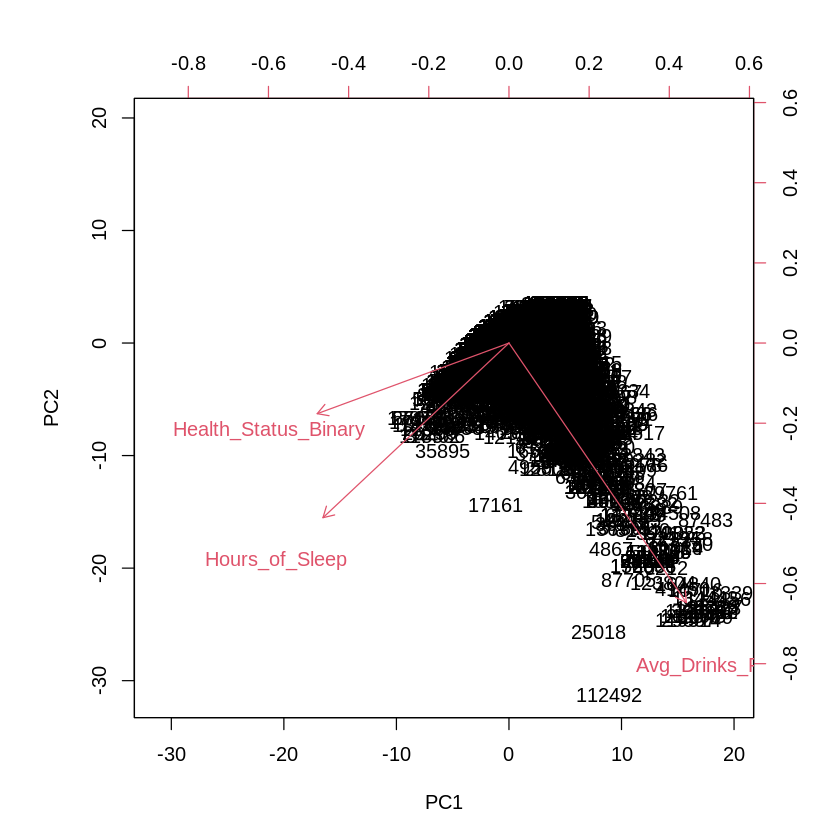

In [ ]:
numeric_vars <- data_cleaned2 %>% select_if(is.numeric)

# Perform PCA
pca <- prcomp(numeric_vars, scale. = TRUE)
# Biplot
biplot(pca, scale = 0)

### Use Cross Validation
To see if adding interaction terms helps improve accuracy at all

In [ ]:
# Split the data into training and testing sets
train_ratio <- 0.7
set.seed(123)  # For reproducibility
train_indices <- sample.int(n = nrow(data_cleaned2), size = floor(train_ratio * nrow(data_cleaned2)))

# Create training and test datasets
train_data <- data_cleaned2[train_indices, ]
test_data <- data_cleaned2[-train_indices, ]

In [ ]:
# First Model
model1 <- glm(Health_Status_Binary ~ Smoking_Status +  Physical_Activity +
                          Avg_Drinks_Per_Day + Hours_of_Sleep + Age_Group + Sex,
                          data = train_data, family = "binomial"(link='logit'))

summary(model1)


Call:
glm(formula = Health_Status_Binary ~ Smoking_Status + Physical_Activity + 
    Avg_Drinks_Per_Day + Hours_of_Sleep + Age_Group + Sex, family = binomial(link = "logit"), 
    data = train_data)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   1.346271   0.072804  18.492  < 2e-16 ***
Smoking_StatusSomeday smoker -0.009667   0.044275  -0.218  0.82716    
Smoking_StatusFormer smoker   0.551559   0.029733  18.550  < 2e-16 ***
Smoking_StatusNon-smoker      1.045946   0.028939  36.143  < 2e-16 ***
Physical_ActivityNo          -1.184743   0.020766 -57.052  < 2e-16 ***
Avg_Drinks_Per_Day           -0.028759   0.003109  -9.251  < 2e-16 ***
Hours_of_Sleep                0.127803   0.007046  18.137  < 2e-16 ***
Age_Group25-29                0.073889   0.065619   1.126  0.26016    
Age_Group30-34                0.091928   0.064311   1.429  0.15288    
Age_Group35-39                0.100560   0.063036   1.595  0.11065    
Age_

In [ ]:
# 2. Interaction between Smoking Status and Physical Activity and Age Group and Average Drinks Per Day
model2 <- glm(Health_Status_Binary ~ Smoking_Status *  Physical_Activity + Sex +
                          Age_Group * Avg_Drinks_Per_Day + Hours_of_Sleep,
                          data = train_data, family = "binomial"(link='logit'))

summary(model2)


Call:
glm(formula = Health_Status_Binary ~ Smoking_Status * Physical_Activity + 
    Sex + Age_Group * Avg_Drinks_Per_Day + Hours_of_Sleep, family = binomial(link = "logit"), 
    data = train_data)

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                       1.148848   0.083084  13.828
Smoking_StatusSomeday smoker                      0.090493   0.054325   1.666
Smoking_StatusFormer smoker                       0.741264   0.037189  19.932
Smoking_StatusNon-smoker                          1.269546   0.036153  35.116
Physical_ActivityNo                              -0.800467   0.046680 -17.148
SexFemale                                         0.060039   0.019802   3.032
Age_Group25-29                                    0.070780   0.084463   0.838
Age_Group30-34                                    0.131695   0.081082   1.624
Age_Group35-39                                    0.153998   0.080229   1.919
Age_G

In [ ]:
# 3. Adding polynomial terms to continous predictors
# Interaction between Smoking Status and Physical Activity and Age Group and Average Drinks Per Day
model3 <- glm(Health_Status_Binary ~ Smoking_Status *  Physical_Activity + Sex +
                          Age_Group * I(Avg_Drinks_Per_Day^2) + I(Hours_of_Sleep^2),
                          data = train_data, family = "binomial"(link='logit'))

summary(model3)


Call:
glm(formula = Health_Status_Binary ~ Smoking_Status * Physical_Activity + 
    Sex + Age_Group * I(Avg_Drinks_Per_Day^2) + I(Hours_of_Sleep^2), 
    family = binomial(link = "logit"), data = train_data)

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                       1.742e+00  6.080e-02  28.658
Smoking_StatusSomeday smoker                      1.058e-01  5.422e-02   1.952
Smoking_StatusFormer smoker                       7.796e-01  3.699e-02  21.079
Smoking_StatusNon-smoker                          1.323e+00  3.582e-02  36.924
Physical_ActivityNo                              -8.129e-01  4.648e-02 -17.490
SexFemale                                         8.110e-02  1.958e-02   4.143
Age_Group25-29                                    7.648e-02  6.629e-02   1.154
Age_Group30-34                                    9.999e-02  6.486e-02   1.541
Age_Group35-39                                    1.082e-01  6.3

In [ ]:
rmse <- function(u,v) sqrt(mean((u-v)^2))

# Actual data points
actuals <- test_data$Health_Status_Binary

# Predictions for model1
predictions1 <- predict(model1, newdata = test_data, type = "response")

# Predictions for model2
predictions2 <- predict(model2, newdata = test_data, type = "response")

# Predictions for model3
predictions3 <- predict(model3, newdata = test_data, type = "response")

# RMSE calculations for each model
rmse(predictions1, actuals)
rmse(predictions2, actuals)
rmse(predictions3, actuals)

[1] 0.2846487

[1] 0.2843372

[1] 0.2849644

Seems like model2 performs better

In [ ]:
# Make predictions on the test set using the model that performs better according to analysis above
predicted_classes <- ifelse(predictions2 > 0.5, 1, 0)

# Create confusion matrix
conf_matrix <- table(test_data$Health_Status_Binary, predicted_classes)
print(conf_matrix)

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", round(accuracy, 3)))

# Calculate odds ratios
odds_ratios <- exp(coef(model_logistic))
print(odds_ratios)


   predicted_classes
        0     1
  0    13  5288
  1    16 49517
[1] "Accuracy: 0.903"
                 (Intercept) Smoking_StatusSomeday smoker 
                   3.5689011                    1.0586940 
 Smoking_StatusFormer smoker     Smoking_StatusNon-smoker 
                   1.8054982                    2.8946161 
         Physical_ActivityNo           Avg_Drinks_Per_Day 
                   0.3003953                    0.9733003 
              Hours_of_Sleep                    SexFemale 
                   1.1385533                    1.0568949 
              Age_Group25-29               Age_Group30-34 
                   1.1188369                    1.1602158 
              Age_Group35-39               Age_Group40-44 
                   1.1407581                    1.0183528 
              Age_Group45-49               Age_Group50-54 
                   0.8801729                    0.7729972 
              Age_Group55-59               Age_Group60-64 
                   0.664

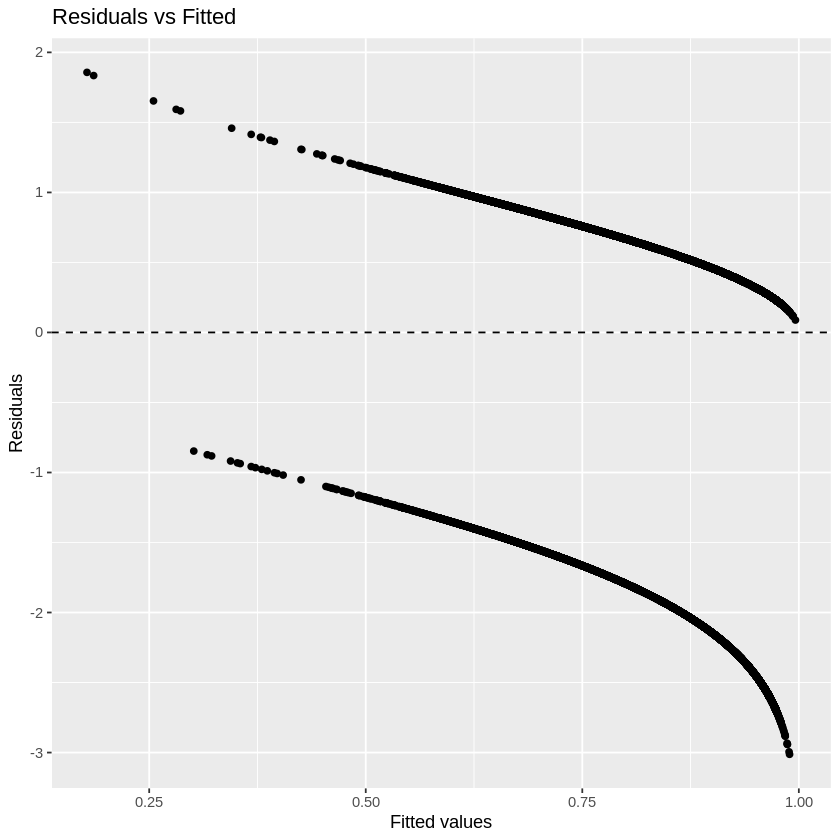

In [ ]:
# Plot residuals
residuals2 <- residuals(model2, type = "deviance")
fitted_values2 <- fitted(model2)
ggplot(data = NULL, aes(x = fitted_values2, y = residuals2)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Residuals vs Fitted", x = "Fitted values", y = "Residuals")

## Methodology and Results Discussion

To assess the impact of lifestyle factors on general health, logistic regression was employed. The response variable, general health status, was dichotomized into "Good" (combining "Excellent," "Very Good," and "Good") and "Poor" (combining "Fair" and "Poor"). The predictors included smoking status, alcohol consumption, physical activity, and hours of sleep, with sex and age included as control variables.

The logistic regression analysis yielded several key findings:

- *Smoking Status:* Being a former smoker or a non-smoker is associated with a significantly higher probability of being in good health compared to current smokers, who served as the reference group.

- *Physical Activity:* Not engaging in physical activity (categorized as "Physical_ActivityNo") is strongly associated with worse health outcomes.

- *Avg_Drinks_Per_Day:* Higher average daily alcohol consumption is associated with slightly lower odds of good health, though the effect size was relatively small. This suggests that while moderate drinking may not drastically impact health, excessive consumption could have adverse effects.

- *Hours of Sleep:* More hours of sleep are positively associated with better health, confirming the importance of adequate sleep for overall well-being.

- *Age Group:* Older age groups generally have lower odds of being in good health, with the effect becoming more pronounced in higher age groups. This is consistent with the natural decline in health associated with aging.

- *Sex:* Females have slightly higher odds of being in good health compared to males, although the difference is modest.

#### Checking for Multicollinearity

Multicollinearity was assessed by calculating the Variance Inflation Factor (VIF) for each predictor in the logistic regression model. The VIF values ranged from 1.013 to 1.042, indicating no significant multicollinearity among the predictors, as all VIF values were well below the common threshold of 5. This suggests that the predictors in the model are relatively independent of one another, allowing for more reliable coefficient estimates.

#### Residuals Analysis

A residuals analysis was performed to assess the model fit. The residuals showed curved patterns and tails, suggesting that the logistic regression model may not fully capture the underlying relationships in the data. This could be due to variables not included in the dataset, non-linear relationships, or other complexities not accounted for by the model.

#### Subset Selection

Subset selection was used to identify the best model by evaluating the Cp statistic for models with different numbers of predictors. The Cp plot indicated that the full model, which includes all predictors, was the most appropriate choice, as it had the lowest Cp value. This implies that the full model provides the best trade-off between model complexity and goodness of fit.

#### Principal Component Analysis (PCA)

PCA was performed on the numeric variables to explore potential dimensionality reduction. However, the analysis indicated that the existing model structure was sufficient, and PCA was not implemented in the final models to preserve the interpretability of the original variables.

#### Using Cross-Validation

Cross-validation techniques were employed to further refine and improve the model. Three different logistic regression models were evaluated:

- *Model 1:* Included main effects for all predictors (Smoking Status, Physical Activity, Avg Drinks Per Day, Hours of Sleep, Age Group, and Sex). All predictors were statistically significant in this model.

- *Model 2:* Interaction terms were added between Smoking Status and Physical Activity, as well as between Age Group and Avg Drinks Per Day. The inclusion of interaction terms improved the model's fit slightly, as indicated by a lower Akaike Information Criterion (AIC) compared to Model 1.

- *Model 3:* This model extended Model 2 by adding polynomial terms for continuous predictors (Avg Drinks Per Day and Hours of Sleep) to address non-linear patterns observed in the residual plots. However, the polynomial terms for Avg Drinks Per Day were not statistically significant, suggesting that these additions did not substantially enhance the model.

#### Model Comparison and Final Selection

All three models provided significant predictors of health status, with the inclusion of interaction and polynomial terms offering slight improvements. However, simpler models (Model 1 and Model 2) provided a better balance of interpretability and predictive performance.

The Root Mean Square Error (RMSE) was calculated for each model based on predictions made on the test dataset:

- *Model 1:* RMSE = 0.2846
- *Model 2:* RMSE = 0.2843
- *Model 3:* RMSE = 0.2850

Model 2 had the lowest RMSE, indicating that it was the best-performing model in terms of prediction accuracy. Therefore, Model 2 was selected for making predictions on the test dataset. By applying a threshold of 0.5 to the predicted probabilities, each observation was classified into one of the two health status categories.

The confusion matrix for Model 2's predictions was as follows:

- *True Negatives (TN):* 13
- *False Negatives (FN):* 5288
- *False Positives (FP):* 16
- *True Positives (TP):* 49517

The overall accuracy of Model 2 was calculated as: (TP+TN)/Total = 0.903, meaning that Model 2 correctly predicted the health status in approximately 90% of cases.

#### Residual Plot of Model 2

The residual plot for Model 2 indicated that the residuals formed two curves on either side of zero, with a pronounced tail on one side. This suggests that despite the high accuracy (90.3%), the model may not fully capture all underlying patterns in the data. The presence of these residual patterns hints at possible issues such as class imbalance, overfitting, or non-linear relationships that were not adequately modeled.

This observation implies that the high accuracy achieved by Model 2 might be misleading, potentially due to factors like class imbalance or the inherent limitations of logistic regression in capturing complex data patterns. The residual plots, along with the lack of improvement from adding polynomial terms, suggest that linear regression might not be the most appropriate modeling approach for this dataset. Alternative modeling techniques could be explored in future analyses to better capture the data's complexity and improve prediction accuracy.



#### Overall Findings

The findings from this study confirm the significant impact of lifestyle factors on general health status. Smoking status emerged as a critical predictor, with current smokers being at a much higher risk of reporting poor health compared to non-smokers and former smokers. Physical activity was another major factor, with regular exercise significantly improving the likelihood of good health.

Sleep duration also played a crucial role, with adequate sleep being associated with better health outcomes. Although alcohol consumption showed a slight negative effect on health, its impact was relatively minor compared to smoking and physical activity. Age and sex were important control variables, with older age groups and males generally experiencing poorer health outcomes.

The enhanced logistic regression model with interaction terms provided the best balance between accuracy and interpretability. However, the analysis also highlighted the potential limitations of the model, particularly in capturing non-linear relationships and dealing with class imbalance.



#### Limitations

While the analysis provided valuable insights, several limitations must be acknowledged. Firstly, the self-reported data from the BRFSS is subject to biases such as recall bias and social desirability bias. Respondents may underreport or overreport certain behaviors, which could affect the accuracy of the results. The surveying data collection method is simply not an empirical enough measurement. The categorization of general health status may also oversimplify the complexity of health outcomes.

Moreover, the logistic regression model, while effective, may not be the best approach for capturing all the complexities of the data. The residuals analysis suggested that there are underlying patterns not accounted for by the model, potentially due to non-linear relationships or omitted variables. Alternative modeling techniques, such as machine learning approaches, could be explored in future studies to address these issues.

Finally, the study was limited by the variables present in the dataset and those included in the analysis. While we focused on key lifestyle factors, other important determinants of health, such mental health and socioeconomic status, were not included. There also exist other lifestyle factor such as diet which was simply not present in the BRFSS dataset. Future research could incorporate these additional factors to provide a more comprehensive understanding of what influences general health status.

## Sources

Centers for Disease Control and Prevention (CDC) - 2020 BRFSS survey data and Documentation. https://www.cdc.gov/brfss/annual_data/annual_2020.html

Emre, A. (2022, January 4). BRFSS 2020 survey data. Kaggle. https://www.kaggle.com/datasets/aemreusta/brfss-2020-survey-data/code